In [2]:
import pandas as pd
pd.options.display.max_rows = 100 # тут меняем количество строк для отображения
import datetime # библиотека для работы с датами и временем
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # библиотека для визуализации

# специально написанная функция для построения гистограмм для категориальных признаков
# df - таблица
# col_name - имя столбца
# num_elements - количество элементов, которые будем показывать на гистограмме
# rotation_angle - угол поворота подписей оси
def plot_column_hist(df, col_name = 'subject_norm', rotation_angle = 90, num_elements = 20):
    tbl = df[col_name].value_counts().reset_index()[:num_elements]
    tbl = tbl.rename(columns={'index': col_name, col_name: 'qty'}, 
                     index=str).sort_values(by = 'qty', ascending = False)
    x = np.arange(tbl.shape[0])
    plt.figure(figsize = (10, 6))
    plt.bar(x, tbl.qty)
    plt.xticks(x, tbl[col_name], rotation = rotation_angle)
    plt.show()

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Задание по подготовке, нормализации данных.
Загрузим данные по успеваемости учащихся нескольких московских школ.

In [3]:
%%time
df = pd.read_csv('marks_for_prerocessing_sirius.csv.gzip', sep = ';', compression = 'gzip')
df['mark'] = df['mark*weight'] / df['weight']

Wall time: 19.3 s


In [4]:
# размеры данных
df.shape

(5482789, 9)

In [6]:
# первые пару строк
df.head(2)

,guid,subject_name,class_level_name,letter,weight,control_form_name,lesson_date,mark*weight,mark
0,1c903efa-b41e-78b9-e053-a2997e0af59b,Литературное чтение,3,В,2,Пересказ,2018-02-06,10,5.0
1,e86134c2-a728-47e0-e043-a2997e0a78ea,Литературное чтение,3,В,2,Пересказ,2018-02-06,10,5.0


Состав полей:   
guid - идентификатор ученика,   
subject_name - назание предмета,   
class_level_name - номер параллели учащегося,   
letter - буква,   
weight - вес полученной оценки (какие-то оценки являются более важными, например контрольные, самостоятельные работы),   
control_form_name - краткое наименование формы контрольной работы,   
lesson_date - дата урока.
### Взглянем на названия предметов.

In [7]:
# количество строк для каждого из предметов
df.subject_name.value_counts()

Русский язык                                                                                      874519
Английский язык                                                                                   590094
Математика                                                                                        511295
Физическая культура                                                                               380271
Литературное чтение                                                                               263152
Литература                                                                                        254814
Технология                                                                                        220379
Изобразительное искусство                                                                         198001
Алгебра                                                                                           185796
Окружающий мир                                         

In [8]:
# количество уникальных предметов
df.subject_name.unique().shape[0]

220

Видно, что предметов слишком много, и так называемый хвост не является содержательным если мы анализируем общую успеваемость. Давайте оценим, каким количеством предметов можно пренебречь, посчитаем количество поставленных оценок накопительным итогом по предметам, упорядоченным от часто встречающихся к редко встречающимся. И оценим долю от всех оценок.

In [9]:
# доля количества строк для каждого из предметов накопительной суммой
(df.subject_name.value_counts().cumsum().head(80) / df.shape[0]).reset_index()

,index,subject_name
0,Русский язык,0.159503
1,Английский язык,0.267129
2,Математика,0.360384
3,Физическая культура,0.429741
4,Литературное чтение,0.477737
5,Литература,0.524212
6,Технология,0.564407
7,Изобразительное искусство,0.600520
8,Алгебра,0.634407
9,Окружающий мир,0.667957


Получается что можно оставить только 74 предмета и они будут составлять 99% от всех поставленных оценок.   
Оставим только эти 74 предмета и перейдем к нормализации предметов.

In [10]:
# для нормализации нам достаточно названий предметов
(df.subject_name.value_counts().cumsum().head(74) / df.shape[0]).reset_index().rename(columns={'index': 'subject_name', 
    'subject_name': 'qty'}, index=str).to_csv('subject_ref.csv', sep = ',', index = False)

Мы сохранили данные для подготовки справочника и сейчас займемся унификацией предметов в любом текстовом редакторе: содаем дополнительную колонку и исходя из своих экспертных знаний присваиваем им унифицированные значения.

In [11]:
# загружаем нормализованные данные
s_ref = pd.read_csv('subject_ref_done.csv', sep = ';')
del s_ref['qty']
s_ref.head(2)

,subject_name,subject_norm
0,Русский язык,Русский язык
1,Английский язык,Английский язык


Теперь объединим две таблицы.

In [12]:
%%time
df = pd.merge(df, s_ref, how = 'inner', on = 'subject_name')

Wall time: 5.24 s


In [13]:
# еще раз выводим первые строки данных, появляется новый столбец
df.head(2)

,guid,subject_name,class_level_name,letter,weight,control_form_name,lesson_date,mark*weight,mark,subject_norm
0,1c903efa-b41e-78b9-e053-a2997e0af59b,Литературное чтение,3,В,2,Пересказ,2018-02-06,10,5.0,Литература
1,e86134c2-a728-47e0-e043-a2997e0a78ea,Литературное чтение,3,В,2,Пересказ,2018-02-06,10,5.0,Литература


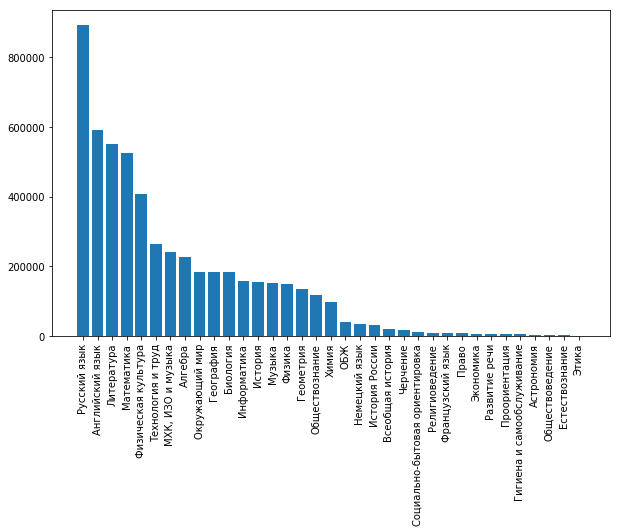

In [19]:
# вызываем функцию, которую мы объявляли в самом начале
plot_column_hist(df, 'subject_norm', rotation_angle = 90, num_elements = 50)

Теперь приведем даты в соответствующий формат (сейчас это текст).

In [20]:
# тип данных для колонки lesson_date
df.dtypes['lesson_date']

dtype('O')

In [24]:
%%time
# функция преобразования строковых данных в дату
df.lesson_date = df.lesson_date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

TypeError: strptime() argument 1 must be str, not Timestamp

In [25]:
# тип данных для колонки lesson_date
df.dtypes['lesson_date']

dtype('<M8[ns]')

Добавим колонку, в которой будет только месяц, без дня. Используем его в дальнейшем для агрегации.

In [26]:
df['mondate'] = df.lesson_date.apply(lambda x: datetime.date(x.year, x.month, 1))

In [27]:
df.mondate.value_counts()

2017-12-01    696955
2017-10-01    689878
2018-03-01    669525
2017-11-01    634047
2017-09-01    576836
2018-02-01    548683
2018-01-01    548218
2018-04-01    547011
2018-05-01    517839
Name: mondate, dtype: int64

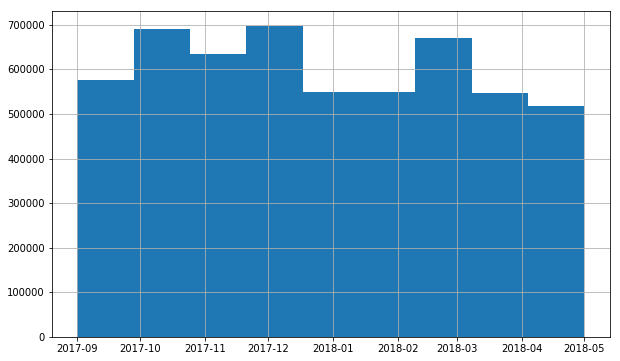

In [28]:
df.mondate.hist(bins=9, figsize = (10, 6))

Первая визуализация: Давайте посмотрим, как меняется средняя успеваемость в течении года.

In [29]:
pd.pivot_table(df, index = 'subject_norm', columns = 'mondate', 
               values = 'mark', aggfunc = np.mean)

mondate,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
subject_norm,,,,,,,,,
Алгебра,3.664417,3.695551,3.689512,3.734774,3.694524,3.711362,3.715100,3.694576,3.710698
Английский язык,4.102314,4.058308,4.079698,4.057689,4.069294,4.074272,4.039078,4.034764,4.023171
Астрономия,4.228374,3.793478,3.990066,3.981308,4.143836,4.194836,4.344519,4.394521,4.515213
Биология,4.022017,3.955415,3.889914,3.945400,3.906024,3.949098,3.895053,3.922079,4.009499
Всеобщая история,4.068471,4.009527,4.003950,4.108645,4.121212,4.092593,4.192701,3.955446,4.011538
География,3.977504,3.950798,3.942386,3.959248,3.923768,3.994793,3.940027,3.987050,4.041639
Геометрия,3.732883,3.611542,3.655900,3.643263,3.632636,3.658058,3.670265,3.663751,3.642236
Гигиена и самообслуживание,4.307054,4.307985,4.293260,4.244519,4.000000,4.036965,4.068143,4.083710,4.183246
Естествознание,4.070103,3.717431,3.725067,3.660036,2.500000,5.000000,2.672727,2.187050,2.763359


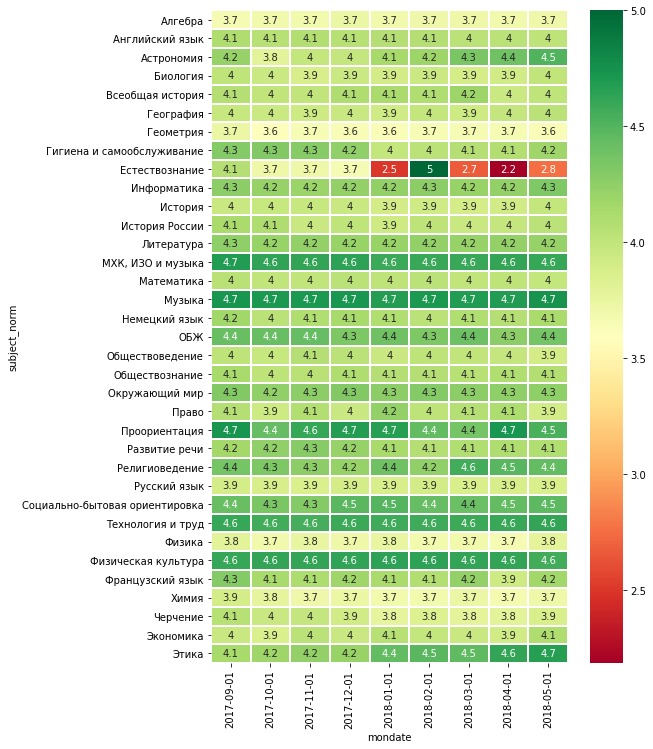

In [30]:
# уже готовая функция для отображения диаграмм в виде "тепловых карт"
sns.heatmap(pd.pivot_table(df, index = 'subject_norm', columns = 'mondate', values = 'mark', 
                           aggfunc = np.mean), figsize (8, 12), cmap='RdYlGn', linewidths=1, annot=True)

Попробуйте ответить на простые ответы, взглянув на эту диаграмму:    
По каким предметам успеваемость меняется в течении года кардинально?   
По каким предметам мы имеем наивысшую успеваемость?    
По каким предметам успеваемость заметно ниже средней?    
По каким успеваемость улучшается в течении года?

#### Возьмем предыдущую диаграмму за основу и изменим ее так, чтобы вместо месяцев были порядковые номера параллелей

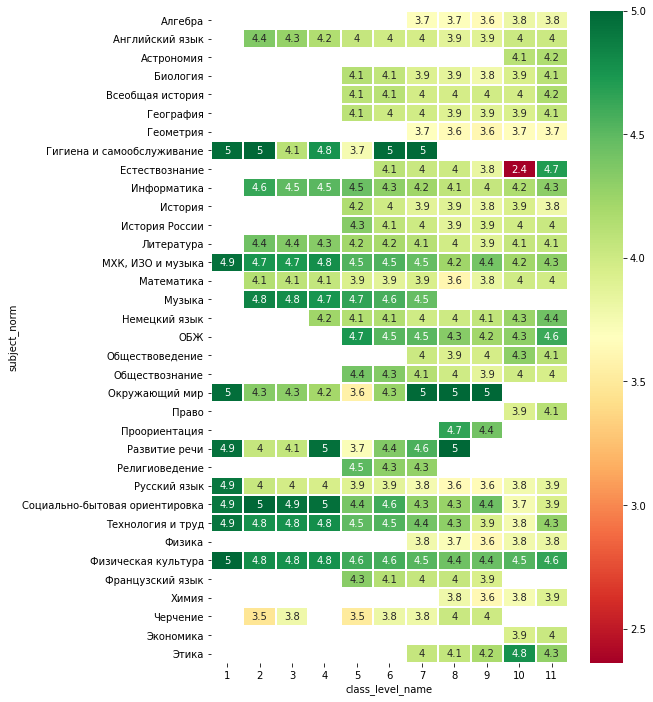

In [31]:
### ВАШ КОД ЗДЕСЬ
sns.heatmap(pd.pivot_table(df, index = 'subject_norm', columns = 'class_level_name', values = 'mark', 
                           aggfunc = np.mean), figsize (8, 12), cmap='RdYlGn', linewidths=1, annot=True)

#### Придумайте вопросы, которые могут помочь вам выявить закономерности в данных и ответьте на них

ваши вопросы и ответы здесь

In [ ]:
for i in range(7):
    x = datetime.date(2018, 6, 1 + i)
    print(x)
    print(x.weekday())
    print((x - datetime.timedelta(x.weekday())))
    print()

Самостоятельное задание: выделите из даты номер недели и получите похожую диаграмму, 
но вместо месяцев нужны будут недели.    
Для этого вам могут быть полезны следующие приемы:

In [ ]:
x = datetime.date(2018, 6, 1)
print('это дата', x)
print('этот метод возвращает номер недели для даты', x.weekday())
print('чтобы складывать даты, можно использовать тип timedelta, первый агрумент это количество дней', 
      datetime.timedelta(1))
print('добавить день к дате можно так', x + datetime.timedelta(1))

Посмотрите на заполненность формы ответа, попробуйте написать на питоне функцию, которая бы нормализовала бы эти значения.

In [22]:
df.control_form_name.value_counts()

Устный ответ                                                866159
Практическая работа                                         719057
Самостоятельная работа                                      530725
Домашняя работа                                             490805
Тест                                                        304141
Контрольная работа                                          268440
Работа на уроке                                             216536
Устный ответ, работа на уроке                               131607
Диктант                                                     130470
Активность на уроке                                         112007
Выполнение упражнений                                        93388
Устный  ответ                                                86203
Ответ на уроке                                               81073
Сочинение                                                    77595
Проверочная работа                                           7

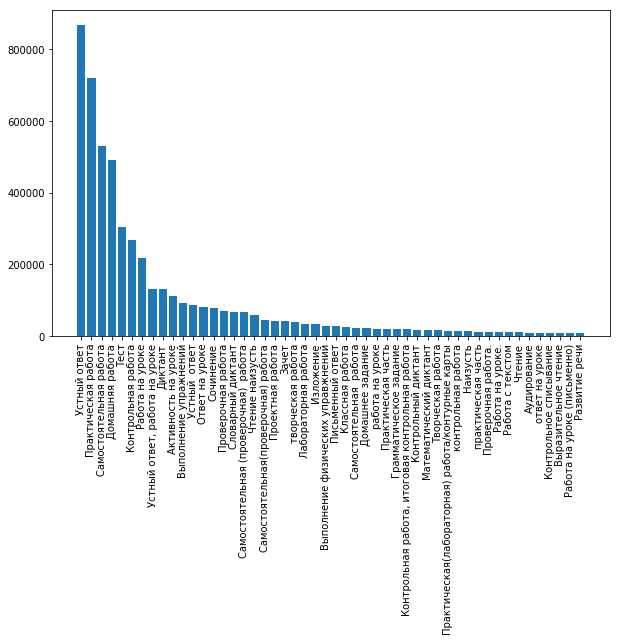

In [23]:
plot_column_hist(df, 'control_form_name', rotation_angle = 90, num_elements = 50)